In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

#print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsh harbour
Processing Record 2 of Set 1 | san luis
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | pospelikha
Processing Record 9 of Set 1 | hukuntsi
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | sola
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | lagoa
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | tokur
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | mitsamiouli
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | shingu
Processing Record 22 of Set 1 | albany
Pr

Processing Record 40 of Set 4 | cabedelo
Processing Record 41 of Set 4 | nenjiang
Processing Record 42 of Set 4 | palu
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | mandalgovi
Processing Record 45 of Set 4 | ekhabi
Processing Record 46 of Set 4 | foumban
Processing Record 47 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 4 | goderich
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | pyapon
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 5 | arona
Processing Record 5 of Set 5 | saint-georges
Processing Record 6 of Set 5 | yaan
Processing Record 7 of Set 5 | barbar
City not found. Skipping...
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | buenaventura
Processing Record 10 of Set 5 | merke
Processing Record 11 of Set 5 | okha
Processing Record

Processing Record 29 of Set 8 | dalvik
Processing Record 30 of Set 8 | mezibori
Processing Record 31 of Set 8 | stara synyava
Processing Record 32 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 8 | saltillo
Processing Record 35 of Set 8 | jiazi
Processing Record 36 of Set 8 | dudhani
Processing Record 37 of Set 8 | vianopolis
Processing Record 38 of Set 8 | abay
Processing Record 39 of Set 8 | medford
Processing Record 40 of Set 8 | dubai
Processing Record 41 of Set 8 | tiznit
Processing Record 42 of Set 8 | perth
Processing Record 43 of Set 8 | yartsevo
Processing Record 44 of Set 8 | regidor
Processing Record 45 of Set 8 | meyungs
City not found. Skipping...
Processing Record 46 of Set 8 | sinnamary
Processing Record 47 of Set 8 | luwuk
Processing Record 48 of Set 8 | constantine
Processing Record 49 of Set 8 | cayenne
Processing Record 50 of Set 8 | atarra
Processing Record 1 of Set 9 

Processing Record 17 of Set 12 | vila
Processing Record 18 of Set 12 | rorvik
Processing Record 19 of Set 12 | pozo colorado
Processing Record 20 of Set 12 | znamenskoye
Processing Record 21 of Set 12 | mackenzie
Processing Record 22 of Set 12 | channel-port aux basques
Processing Record 23 of Set 12 | sant feliu de guixols
Processing Record 24 of Set 12 | boyolangu
Processing Record 25 of Set 12 | honningsvag
Processing Record 26 of Set 12 | ellensburg
Processing Record 27 of Set 12 | west plains
Processing Record 28 of Set 12 | lucea
Processing Record 29 of Set 12 | sambava
Processing Record 30 of Set 12 | pak phanang
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | cabo rojo
Processing Record 33 of Set 12 | misratah
Processing Record 34 of Set 12 | uyuni
Processing Record 35 of Set 12 | marsala
Processing Record 36 of Set 12 | constitucion
Processing Record 37 of Set 12 | ketchikan
Processing Record 38 of Set 12 | tsumeb
Processing Record 39 of Set 12 | sid

In [8]:
len(city_data)

550

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marsh Harbour,26.5412,-77.0636,300.02,68,7,2.89,BS,2022-05-15 20:30:51
1,San Luis,-33.2950,-66.3356,285.99,30,5,5.18,AR,2022-05-15 20:30:52
2,Lavrentiya,65.5833,-171.0000,273.28,79,42,5.29,RU,2022-05-15 20:30:53
3,Jamestown,42.0970,-79.2353,300.66,50,0,2.57,US,2022-05-15 20:30:53
4,Yellowknife,62.4560,-114.3525,285.44,35,75,5.66,CA,2022-05-15 20:30:38
5,Kapaa,22.0752,-159.3190,299.33,78,20,4.63,US,2022-05-15 20:30:55
6,Pospelikha,51.9500,81.7667,286.38,84,23,3.84,RU,2022-05-15 20:30:56
7,Hukuntsi,-24.0000,21.7500,293.99,28,100,1.25,BW,2022-05-15 20:30:56
8,Bambous Virieux,-20.3428,57.7575,296.29,94,75,4.63,MU,2022-05-15 20:30:57
9,Sola,-13.8833,167.5500,300.01,73,100,7.02,VU,2022-05-15 20:30:58


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsh Harbour,BS,2022-05-15 20:30:51,26.5412,-77.0636,300.02,68,7,2.89
1,San Luis,AR,2022-05-15 20:30:52,-33.2950,-66.3356,285.99,30,5,5.18
2,Lavrentiya,RU,2022-05-15 20:30:53,65.5833,-171.0000,273.28,79,42,5.29
3,Jamestown,US,2022-05-15 20:30:53,42.0970,-79.2353,300.66,50,0,2.57
4,Yellowknife,CA,2022-05-15 20:30:38,62.4560,-114.3525,285.44,35,75,5.66
5,Kapaa,US,2022-05-15 20:30:55,22.0752,-159.3190,299.33,78,20,4.63
6,Pospelikha,RU,2022-05-15 20:30:56,51.9500,81.7667,286.38,84,23,3.84
7,Hukuntsi,BW,2022-05-15 20:30:56,-24.0000,21.7500,293.99,28,100,1.25
8,Bambous Virieux,MU,2022-05-15 20:30:57,-20.3428,57.7575,296.29,94,75,4.63
9,Sola,VU,2022-05-15 20:30:58,-13.8833,167.5500,300.01,73,100,7.02


In [31]:
# Convert Max Temperature from Kelvin to Fahrenheit
def kelvinToFahrenheit(kelvin):
    return kelvin * 1.8 - 459.67

#city_data_df["Max Temp"].replace()
 
kelvin = city_data_df["Max Temp"]
city_data_df["Max Temp"] = kelvinToFahrenheit(kelvin)

In [32]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsh Harbour,BS,2022-05-15 20:30:51,26.5412,-77.0636,80.366,68,7,2.89
1,San Luis,AR,2022-05-15 20:30:52,-33.2950,-66.3356,55.112,30,5,5.18
2,Lavrentiya,RU,2022-05-15 20:30:53,65.5833,-171.0000,32.234,79,42,5.29
3,Jamestown,US,2022-05-15 20:30:53,42.0970,-79.2353,81.518,50,0,2.57
4,Yellowknife,CA,2022-05-15 20:30:38,62.4560,-114.3525,54.122,35,75,5.66
5,Kapaa,US,2022-05-15 20:30:55,22.0752,-159.3190,79.124,78,20,4.63
6,Pospelikha,RU,2022-05-15 20:30:56,51.9500,81.7667,55.814,84,23,3.84
7,Hukuntsi,BW,2022-05-15 20:30:56,-24.0000,21.7500,69.512,28,100,1.25
8,Bambous Virieux,MU,2022-05-15 20:30:57,-20.3428,57.7575,73.652,94,75,4.63
9,Sola,VU,2022-05-15 20:30:58,-13.8833,167.5500,80.348,73,100,7.02


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/15/22'

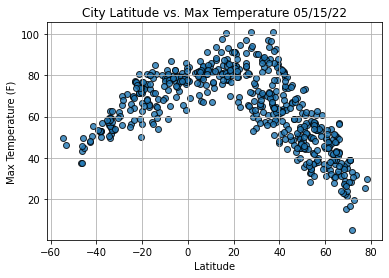

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

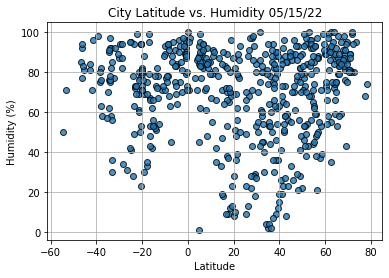

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

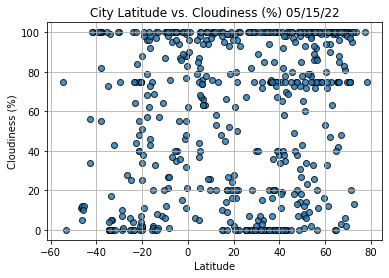

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

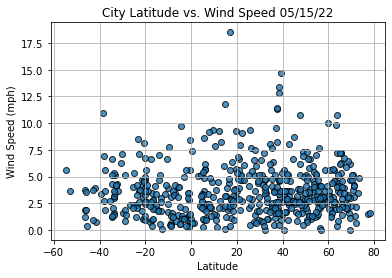

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsh Harbour,BS,2022-05-15 20:30:51,26.5412,-77.0636,80.366,68,7,2.89
2,Lavrentiya,RU,2022-05-15 20:30:53,65.5833,-171.0000,32.234,79,42,5.29
3,Jamestown,US,2022-05-15 20:30:53,42.0970,-79.2353,81.518,50,0,2.57
4,Yellowknife,CA,2022-05-15 20:30:38,62.4560,-114.3525,54.122,35,75,5.66
5,Kapaa,US,2022-05-15 20:30:55,22.0752,-159.3190,79.124,78,20,4.63


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

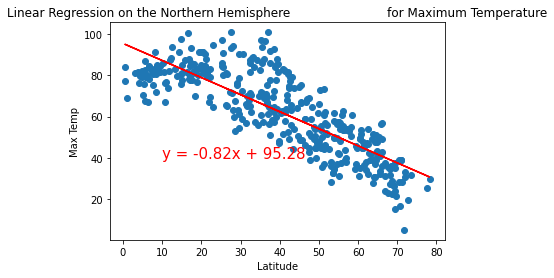

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

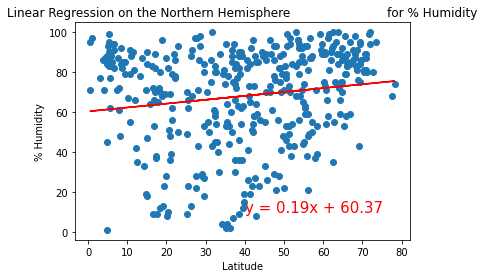

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

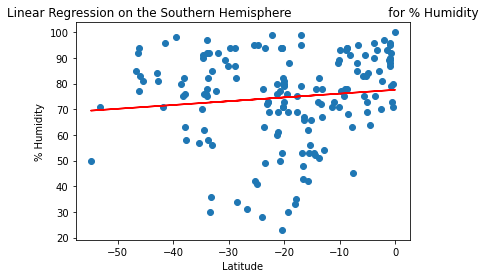

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

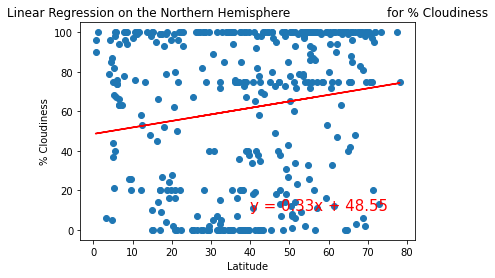

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

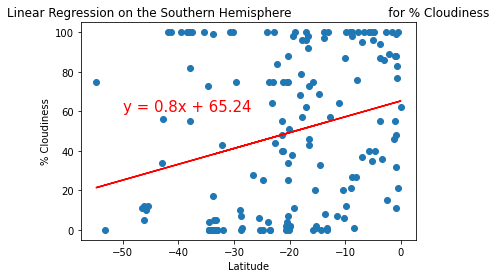

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

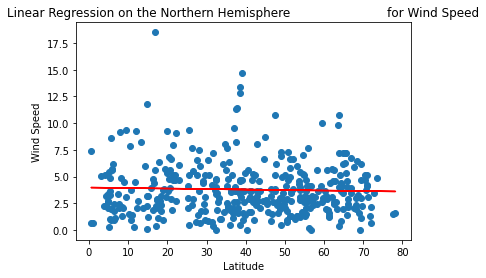

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

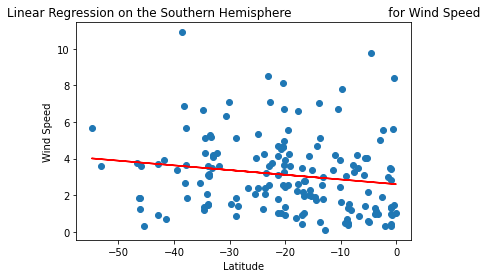

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))